In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import torch 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

#logs = os.listdir(path)

best_loss ={}
dfs = {}
params = {'axes.labelsize': 20,
          'axes.titlesize': 30,
         }
plt.rcParams.update(params)


In [2]:
def get_agg_data(names, curve_type='train', model='vgg11', dataset='cifar10'):
    folder_path = './logs/{}/{}'.format(dataset, model)
    paths = [os.path.join(folder_path, name) for name in names]  
    curves = {name: torch.load(fp) for name, fp in zip(names, paths)}#get_data(names[opt])  
    df_agg = pd.DataFrame({ key : value[curve_type +'_acc'] for key, value in curves.items()})
    return df_agg

def agg_plot(names, curve_type='train', model='vgg11', labels = None, ylim=(80,101), loc = 'upper left', figsize=(10,8), dataset='cifar10'):
    plt.figure(figsize=figsize)
    plt.ylim(ylim)
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
   
        df_agg = get_agg_data(names[opt], curve_type, model, dataset=dataset)
    
        
    
        acc = np.array(df_agg.mean(axis=1))
        std = np.array(df_agg.std(axis=1))    
        x = range(1, len(acc)+1)
        if 'theopoula' in label.lower():
            plt.plot(x, acc, '-', label=label, linewidth=2)
        else: 
            plt.plot(x, acc, '--', label=label, linewidth=2)
        plt.fill_between(x, acc-std, acc+std, alpha=0.15)
  
    plt.legend(fontsize=25, loc=loc)
    plt.grid()
    plt.title('{} ACCURACY'.format(curve_type.upper()))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(fontsize =20)
    plt.yticks(fontsize =20)
    plt.tight_layout()
    plt.show()

def get_best_acc(names, curve_type='train', model='vgg11', labels = None, dataset='cifar10'):  
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
        df_agg = get_agg_data(names[opt], curve_type, model, dataset)
        print(opt, df_agg.max(axis=0).mean(), df_agg.max(axis=0).std())



    


### **SLFN**



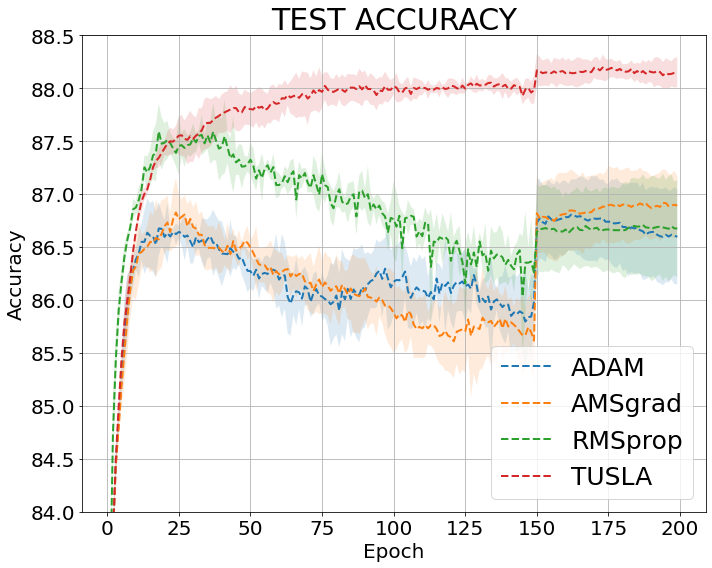

adam 87.02666666666666 0.02886751345947965
amsgrad 87.12666666666667 0.22188585654190474
rmsprop 87.69666666666667 0.22143471573656562
tusla 88.22333333333334 0.0929157324317743


In [7]:
names = {'adam':['f_mnist-adam-slfn-seed111-lr0.001-betas0.9-0.999-wdecay1e-05',                                   
                 'f_mnist-adam-slfn-seed222-lr0.001-betas0.9-0.999-wdecay1e-05',                                   
                 'f_mnist-adam-slfn-seed333-lr0.001-betas0.9-0.999-wdecay1e-05',                                   
          ],
         'amsgrad':['f_mnist-amsgrad-slfn-seed111-lr0.001-betas0.9-0.999-wdecay1e-05',                     
                    'f_mnist-amsgrad-slfn-seed222-lr0.001-betas0.9-0.999-wdecay1e-05',                     
                    'f_mnist-amsgrad-slfn-seed333-lr0.001-betas0.9-0.999-wdecay1e-05',                     
         ],
         'rmsprop':['f_mnist-rmsprop-slfn-seed111-lr0.001-wdecay1e-05',
                    'f_mnist-rmsprop-slfn-seed222-lr0.001-wdecay1e-05',
                    'f_mnist-rmsprop-slfn-seed333-lr0.001-wdecay1e-05',
         ],
         'tusla':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0',                      
                  'f_mnist-tusla-slfn-seed222-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0',                     
                  'f_mnist-tusla-slfn-seed333-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0',                     
         ],                 
        }
labels = ['ADAM',
          'AMSgrad',          
          'RMSprop',       
          'TUSLA'    
         ]
model = 'slfn'
dataset = 'f_mnist'
agg_plot(names, dataset=dataset, curve_type='test', model=model, labels=labels, ylim = (84, 88.5), loc='lower right') 
get_best_acc(names, dataset=dataset, curve_type='test', model=model, labels=labels) 



### TLFN

FileNotFoundError: [Errno 2] No such file or directory: './logs/f_mnist/tlfn\\f_mnist-tusla-tlfn-seed111-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0'

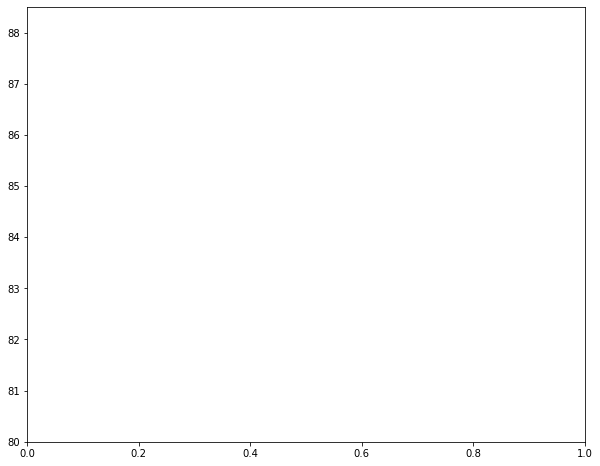

In [9]:
names = {'adam':['f_mnist-adam-tlfn-seed111-lr0.001-betas0.9-0.999-wdecay1e-05',                 
                 'f_mnist-adam-tlfn-seed222-lr0.001-betas0.9-0.999-wdecay1e-05',                 
                 'f_mnist-adam-tlfn-seed333-lr0.001-betas0.9-0.999-wdecay1e-05',                 
          ],
         'amsgrad':['f_mnist-amsgrad-tlfn-seed111-lr0.001-betas0.9-0.999-wdecay1e-05',
                    'f_mnist-amsgrad-tlfn-seed222-lr0.001-betas0.9-0.999-wdecay1e-05',
                    'f_mnist-amsgrad-tlfn-seed333-lr0.001-betas0.9-0.999-wdecay1e-05',
         ],
         'rmsprop':['f_mnist-rmsprop-tlfn-seed111-lr0.001-wdecay1e-05',
                    'f_mnist-rmsprop-tlfn-seed222-lr0.001-wdecay1e-05',
                    'f_mnist-rmsprop-tlfn-seed333-lr0.001-wdecay1e-05',
         ],        
         'tusla':['f_mnist-tusla-tlfn-seed111-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0',                   
                  'f_mnist-tusla-tlfn-seed222-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0',                   
                  'f_mnist-tusla-tlfn-seed333-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0',                   
         ],                 
        }
labels = ['TUSLA',
          'ADAM',
          'AMSgrad',          
          'RMSprop',           
         ]
model = 'tlfn'
dataset = 'f_mnist'
agg_plot(names, dataset=dataset, curve_type='test', model=model, labels=labels, ylim = (80, 88.5), loc='lower right') 
get_best_acc(names, dataset=dataset, curve_type='test', model=model, labels=labels) 

### Sensitivity analysis

### $\beta$

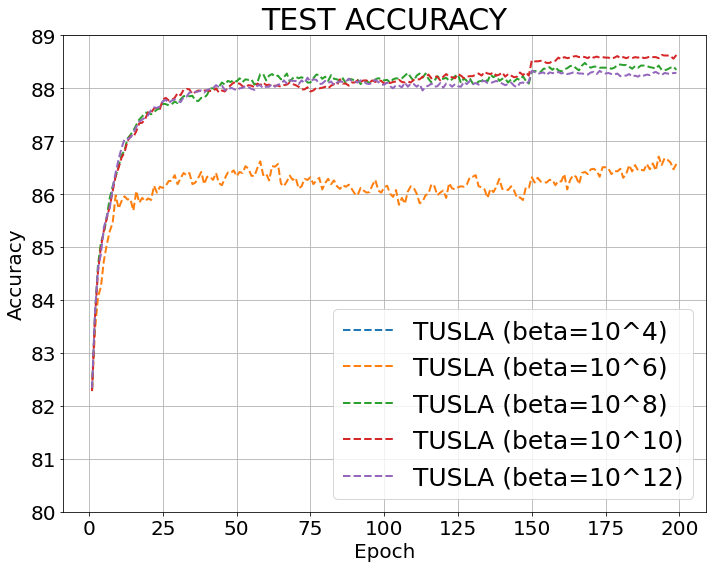

tusla (beta=10^4) 68.32 nan
tusla (beta=10^6) 86.71 nan
tusla (beta=10^8) 88.48 nan
tusla (beta=10^10) 88.63 nan
tusla (beta=10^12) 88.33 nan


In [ ]:
names = {'tusla (beta=10^4)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+04-eta1e-05-wdecay0',                 
          ],
         'tusla (beta=10^6)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+06-eta1e-05-wdecay0',                                        
          ],
         'tusla (beta=10^8)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+08-eta1e-05-wdecay0',                 
          ],
         'tusla (beta=10^10)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+10-eta1e-05-wdecay0',                 
          ],
         'tusla (beta=10^12)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0',                 
          ],
        }
labels = ['TUSLA (beta=10^4)', 
          'TUSLA (beta=10^6)', 
          'TUSLA (beta=10^8)', 
          'TUSLA (beta=10^10)', 
          'TUSLA (beta=10^12)',           
         ]
model = 'slfn'
dataset = 'f_mnist'
agg_plot(names, dataset=dataset, curve_type='test', model=model, labels=labels, ylim = (80, 89), loc='lower right') 
get_best_acc(names, dataset=dataset, curve_type='test', model=model, labels=labels) 

### $r$

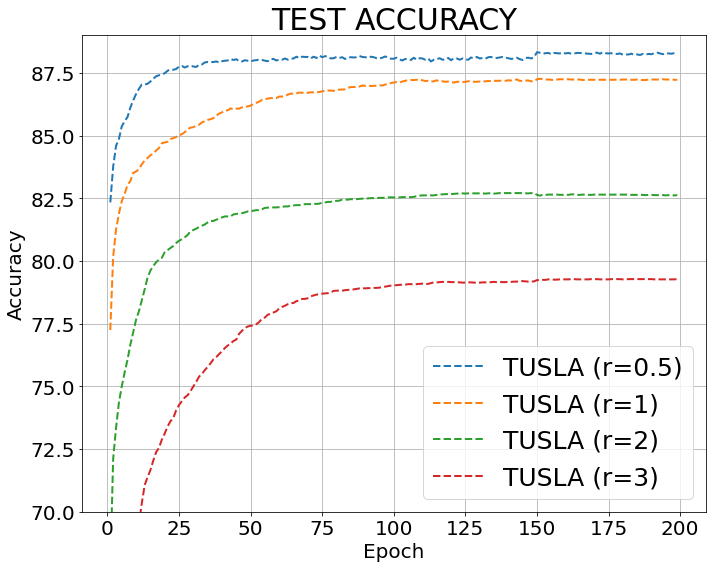

tusla (r=0.5) 88.33 nan
tusla (r=1) 87.27 nan
tusla (r=2) 82.72 nan
tusla (r=3) 79.28 nan


In [ ]:
names = {'tusla (r=0.5)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0',                           
          ],
        'tusla (r=1)':['f_mnist-tusla-slfn-seed111-lr0.5-r1.0-beta1.0e+12-eta1e-05-wdecay0',                           
          ],
         'tusla (r=2)':['f_mnist-tusla-slfn-seed111-lr0.5-r2.0-beta1.0e+12-eta0-wdecay0',    
                        
          ],
         'tusla (r=3)':['f_mnist-tusla-slfn-seed111-lr0.5-r3.0-beta1.0e+12-eta0-wdecay0',                 
                        
          ],
        }
labels = ['TUSLA (r=0.5)', 
          'TUSLA (r=1)', 
          'TUSLA (r=2)', 
          'TUSLA (r=3)',           
         ]
model = 'slfn'
dataset = 'f_mnist'
agg_plot(names, dataset=dataset, curve_type='test', model=model, labels=labels, ylim = (70, 89), loc='lower right') 
get_best_acc(names, dataset=dataset, curve_type='test', model=model, labels=labels) 

### $\eta$

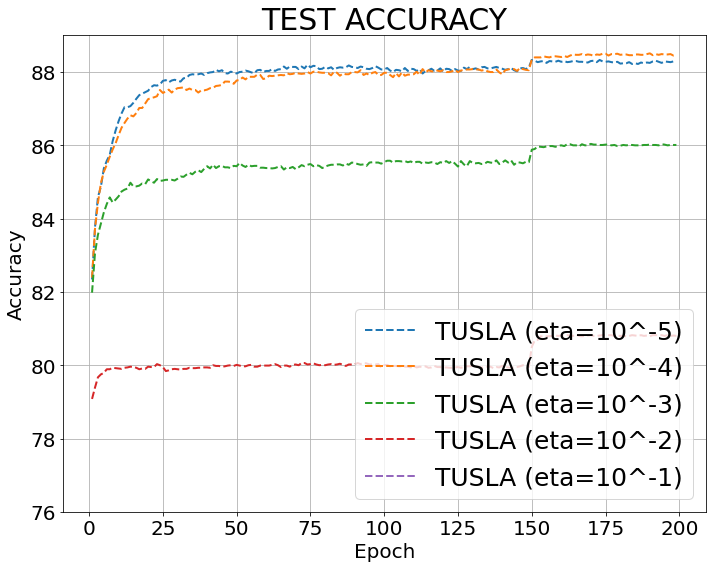

tusla (eta=10^-5) 88.33 nan
tusla (eta=10^-4) 88.51 nan
tusla (eta=10^-3) 86.04 nan
tusla (eta=10^-2) 80.84 nan
tusla (eta=10^-1) 71.84 nan


In [ ]:
names = {'tusla (eta=0)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta0-wdecay0',                                              
          ],
         'tusla (eta=10^-5)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta1e-05-wdecay0',                 
          ],
         'tusla (eta=10^-4)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta0.0001-wdecay0',                 
          ],
         'tusla (eta=10^-3)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta0.001-wdecay0',                 
          ],
         'tusla (eta=10^-2)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta0.01-wdecay0',                 
          ],
         'tusla (eta=10^-1)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta0.1-wdecay0',                 
          ],
        }
labels = [#'TUSLA (eta=0)', 
          'TUSLA (eta=10^-5)', 
          'TUSLA (eta=10^-4)',           
          'TUSLA (eta=10^-3)',           
          'TUSLA (eta=10^-2)',           
          'TUSLA (eta=10^-1)',           
         ]
model = 'slfn'
dataset = 'f_mnist'
agg_plot(names, dataset=dataset, curve_type='test', model=model, labels=labels, ylim = (76, 89), loc='lower right') 
get_best_acc(names, dataset=dataset, curve_type='test', model=model, labels=labels) 

### $\lambda$

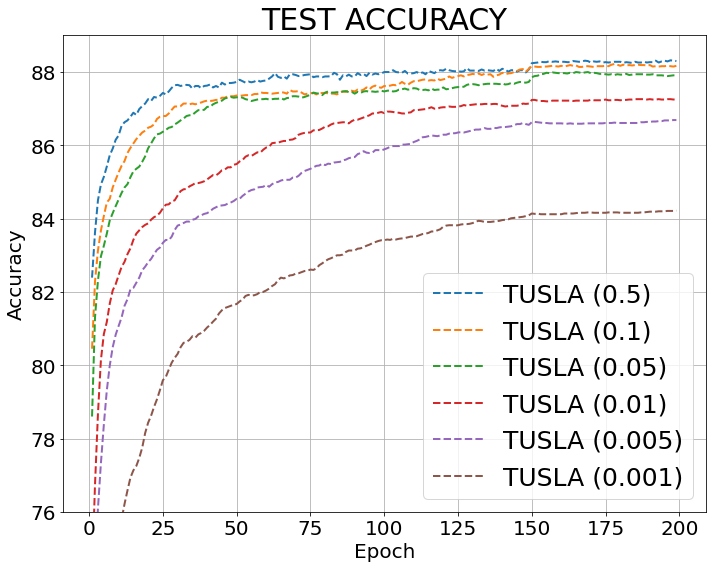

tusla (0.5) 88.32 nan
tusla (0.1) 88.22 nan
tusla (0.05) 88.0 nan
tusla (0.01) 87.26 nan
tusla (0.005) 86.69 nan
tusla (0.001) 84.22 nan


In [7]:
names = {'tusla (0.5)':['f_mnist-tusla-slfn-seed111-lr0.5-r0.5-beta1.0e+12-eta0.0001-wdecay0',                                              
          ],
         'tusla (0.1)':['f_mnist-tusla-slfn-seed111-lr0.1-r0.5-beta1.0e+12-eta0.0001-wdecay0',                                              
          ],
         'tusla (0.05)':['f_mnist-tusla-slfn-seed111-lr0.05-r0.5-beta1.0e+12-eta0.0001-wdecay0',                                              
          ],
         'tusla (0.01)':['f_mnist-tusla-slfn-seed111-lr0.01-r0.5-beta1.0e+12-eta0.0001-wdecay0',                                              
          ],
         'tusla (0.005)':['f_mnist-tusla-slfn-seed111-lr0.005-r0.5-beta1.0e+12-eta0.0001-wdecay0',                                              
          ],
         'tusla (0.001)':['f_mnist-tusla-slfn-seed111-lr0.001-r0.5-beta1.0e+12-eta0.0001-wdecay0',                                              
          ],
        }
labels = ['TUSLA (0.5)', 
          'TUSLA (0.1)', 
          'TUSLA (0.05)',           
          'TUSLA (0.01)',           
          'TUSLA (0.005)',           
          'TUSLA (0.001)',           
         ]
model = 'slfn'
dataset = 'f_mnist'
agg_plot(names, dataset=dataset, curve_type='test', model=model, labels=labels, ylim = (76, 89), loc='lower right') 
get_best_acc(names, dataset=dataset, curve_type='test', model=model, labels=labels) 